In [117]:
import pandas as pd
from importlib import reload

## Configs

In [118]:
BATCH_SIZE = 32
LEARNING_RATE = 5e-4

## Preprocessing
Negative Sampling the dataset

In [178]:
from src.Preprocess.Preprocessor import Preprocessor
Preprocessor.create_negative_sampled_dataset(input_address="data/SA_history_clicks_of_98.csv", 
                                               output_address="data/data2.pkl", 
                                               neg_to_pos_ratio=2)

Reading input file data/SA_history_clicks_of_98.csv



File created at data/data2.pkl


,queryText,packageName,similar
0,توشمال,com.example.masood.yocheneapp,1
1,rush,com.ketchapp.rush,1
2,شب چله,yalda.ir.kr.si.ma.usn,1
3,عشق,com.roman.jadogareeshgh,1
4,کلابی,ir.mmdali.cluby,1
...,...,...,...
32844571,فرار از جنگل,com.morabaerangi.morabirangii,-1
32844572,روبینو,eu.softwareworkshop.brokenscreen,-1
32844573,روبینو,com.rovio.retry,-1
32844574,کاهتهتخنتالفل 644 علیر,mhn.king,-1


## DatasetHandler
Preparing dataset for training

In [227]:
from src.Trainer.DatasetHandler import DatasetHandler

dataset_handler = DatasetHandler("data/data2.pkl", frac=0.1)

Loading tokenizer...
Reading input file...



Shuffling dataset...
Tokenizing ads...


C:\Users\Mohsen\Anaconda3\lib\site-packages\tqdm\std.py:654: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



Creating dataset...
Tokenizing queries...



Done


In [228]:
import pandas as pd
print(dataset_handler.get_dataset())
dataset_handler.df
pd.DataFrame(dataset_handler.get_dataset()["train"][:1000])

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'attention_mask', 'input_ids', 'packageName', 'package_ids', 'queryText', 'similar', 'token_type_ids'],
        num_rows: 2791789
    })
    test: Dataset({
        features: ['__index_level_0__', 'attention_mask', 'input_ids', 'packageName', 'package_ids', 'queryText', 'similar', 'token_type_ids'],
        num_rows: 492669
    })
})


,__index_level_0__,attention_mask,input_ids,packageName,package_ids,queryText,similar,token_type_ids
0,86365,"[1, 1, 1, 1, 0, 0, 0, 0, 0]","[2, 2120, 28111, 4, 0, 0, 0, 0, 0]",ir.sapp.ssms,[33546],اس دلتنگی,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,636731,"[1, 1, 1, 0, 0, 0, 0, 0, 0]","[2, 13898, 4, 0, 0, 0, 0, 0, 0]",com.viamgr.ebook.qomchto,[91258],تت,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,1698834,"[1, 1, 1, 1, 0, 0, 0, 0, 0]","[2, 62995, 53111, 4, 0, 0, 0, 0, 0]",com.iran.videodownloaderforinstagram,[25604],movie maker,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,1179707,"[1, 1, 1, 1, 0, 0, 0, 0, 0]","[2, 8447, 4856, 4, 0, 0, 0, 0, 0]",ir.sabereen.ninima,[43733],نوشتن اسم,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,2108773,"[1, 1, 1, 0, 0, 0, 0, 0, 0]","[2, 85974, 4, 0, 0, 0, 0, 0, 0]",ir.JavadRastad.Tasvirak,[43203],کفشدوزک,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...
995,2116861,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]","[2, 2298, 9598, 4, 0, 0, 0, 0, 0, 0, 0]",com.accogroup.bodysize,[27117],افزایش سایز,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
996,2925315,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 2221, 4, 0, 0, 0, 0, 0, 0, 0, 0]",berooz.tarinha.app.name.rasmi,[3006],ساز,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
997,1956869,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]","[2, 86551, 19469, 25158, 5928, 4, 0, 0, 0, 0, 0]",sarfe.goei.dar.zandegi,[21803],vidcompact,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
998,2517064,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]","[2, 37296, 3559, 4, 0, 0, 0, 0, 0, 0, 0]",ir.pdf.king.hadi,[13584],pv خوان,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


## Training

Train on 2791789 samples, test on 492669 samples
----------------



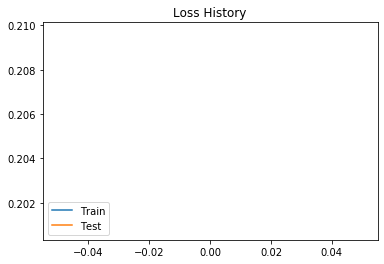

----------------



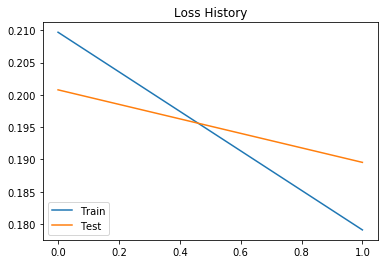

----------------



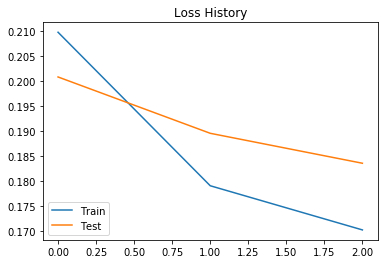

In [229]:
import src.Trainer.RepresentationBuilder
reload(src.Trainer.RepresentationBuilder)
import src.Trainer.QueryAdCoordinator
reload(src.Trainer.QueryAdCoordinator)
import src.Trainer.Trainer
reload(src.Trainer.Trainer)

trainer = src.Trainer.Trainer.Trainer(embedding_dim=50, dataset_handler=dataset_handler, 
                                      learning_rate=LEARNING_RATE, device="cuda")
trainer.train(epochs=3)

In [235]:
trainer.query_ad_coordinator

QueryAdCoordinator(
  (query_representation_builder): RepresentationBuilder(
    (embedding): Embedding(100000, 50)
    (pooling_module): SpanPoolingAvg()
  )
  (ad_representation_builder): RepresentationBuilder(
    (embedding): Embedding(93592, 50)
    (pooling_module): SpanPoolingAvg()
  )
  (loss): CosineEmbeddingLoss()
)

In [236]:
trainer.save_all_representations(ad_reprs_address="representations/ad_reprs.pt",
                                    vocab_reprs_address="representations/vocab_reprs.pt",
                                    id_to_package_address="representations/ad_id_to_package.pkl")


torch.Size([93592, 50])
Saved ad representations at representations/ad_reprs.pt



100000
Saved vocab representations at representations/vocab_reprs.pt


## Prediction

In [237]:
import src.Predictor.Predictor
reload(src.Predictor.Predictor)

predictor = src.Predictor.Predictor.Predictor(ad_reprs_address="representations/ad_reprs.pt",
                                              vocab_reprs_address="representations/vocab_reprs.pt",
                                              id_to_package_address="representations/ad_id_to_package.pkl")

Loading tokenizer...
Loading ad representations...
Loading ad id to package...
Loading vocab representations...


In [238]:
predictor.predict_from_query("امنیت", full_results=True)

dist: 0.90775 com.multiplatform.stage
dist: 0.90423 ir.mohammadamin.rom7
dist: 0.89990 com.project.applocker_appnew
dist: 0.89918 com.carbon.prolocker
dist: 0.89714 com.mohsen.app_locker
dist: 0.89707 com.sec.android.app.sbrowser
dist: 0.89668 com.csi.MojremShenas
dist: 0.89596 com.mahboobede16.tonbak
dist: 0.89585 com.example.ehsans11.pusheTest_fozolgir
dist: 0.89560 com.matindev.typography


(['com.multiplatform.stage',
  'ir.mohammadamin.rom7',
  'com.project.applocker_appnew',
  'com.carbon.prolocker',
  'com.mohsen.app_locker',
  'com.sec.android.app.sbrowser',
  'com.csi.MojremShenas',
  'com.mahboobede16.tonbak',
  'com.example.ehsans11.pusheTest_fozolgir',
  'com.matindev.typography'],
 tensor([0.9078, 0.9042, 0.8999, 0.8992, 0.8971, 0.8971, 0.8967, 0.8960, 0.8958,
         0.8956], grad_fn=<TopkBackward>),
 tensor([14445, 54425, 21279, 38375, 73949, 17111, 52061, 34763, 80251, 34483]),
 tensor([[-109.6945, -131.0799, -116.4271, -116.2002,  -31.6720,   45.9908,
            78.2755,  -32.0955,   27.8706,  130.7870, -124.1387,   17.0513,
            37.8187,  -44.4804,   86.4057,   34.1612,   17.9306, -131.0231,
           130.5369,   62.9885,  116.4533,  -32.1897, -130.7444,   43.9934,
          -131.6630,   70.1253,   48.3948,   43.3948,   70.1074,  130.9617,
           129.8233,   44.4330,  -65.3202,  -52.6170,  -23.3239,   44.2499,
           125.8062,  -28.5879,  

### TSNE

dist: 0.99368 com.feelingtouch.zf3d.farsi
dist: 0.98901 zombie.sccreenroid.ir
dist: 0.98765 com.auxbrain.zombie_highway
dist: 0.98688 com.ea.game.pvzfree_row
dist: 0.98587 com.feelingtouch.gunzombie
dist: 0.98536 com.PercivalApp.ZombieKiller
dist: 0.98481 com.najmejan13.giahanalayhezambii
dist: 0.98477 net.mobigame.zombietsunami
dist: 0.98467 com.gameresort.stupidzombies
dist: 0.98420 com.JESoftware.LastHopeSniperWar
dist: 0.97318 com.skinpacks.crazyzombiekiller
dist: 0.97271 com.popreach.dumbways
dist: 0.97131 com.ChainsawGames.ZKILLER
dist: 0.97036 com.mehdirabiee.xtremedrift2
dist: 0.96963 ir.fanafzar.tetrapuzzle.drift
dist: 0.96933 com.IslamicGame.YeganePoshtibani3
dist: 0.96877 com.motionportrait.ZombieBooth
dist: 0.96858 com.glu.sniperx
dist: 0.96851 ir.mamadina.offroadpatrol
dist: 0.96785 ir.javadkaka.hellishBase


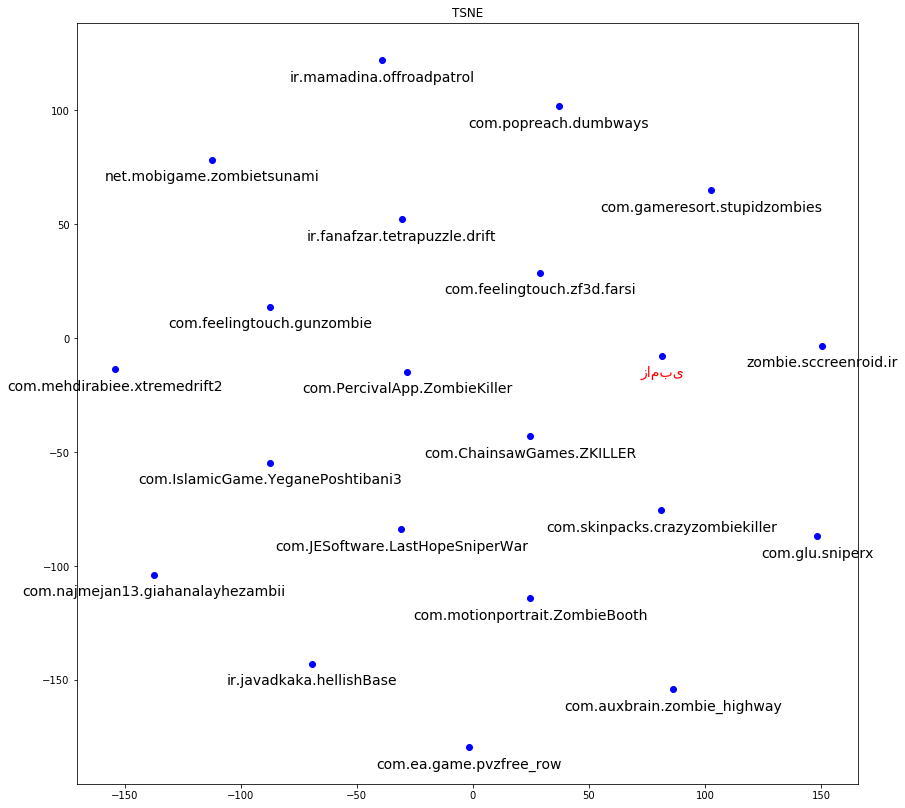

In [239]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

top_k = 20
query = "زامبی"

packages, knn_values, knn_ids, query_repr = predictor.predict_from_query(query, full_results=True, k=top_k)

reprs = torch.cat((predictor.ad_reprs[knn_ids], query_repr), dim=0).detach().numpy()

id_to_name = []
for idx in knn_ids:
    id_to_name.append(predictor.ad_id_to_package[int(idx)])
id_to_name.append(query)

tsne = TSNE(metric='cosine', random_state=123)
embed_tsne = tsne.fit_transform(reprs)
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(top_k + 1):
    plt.scatter(*embed_tsne[idx, :], color='blue')
    plt.title("TSNE")
    if idx == top_k:
        color = "red"
    else:
        color = "black"
    plt.annotate(id_to_name[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), 
                 alpha=1, color=color, fontsize=14, xytext=(0, -10), va='top', ha='center', textcoords='offset points')
